**ECOM90025 Assignment 2**

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [141]:
url_train = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-A2/main/train.csv"
url_test = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-A2/main/test.csv"
url_submission = "https://raw.githubusercontent.com/kkevinliu01/ECOM90025-A2/main/sample_submission.csv"

**Question 1**

Read the training sample to a Pandas dataframe.

In [142]:
df_train = pd.read_csv(url_train, index_col=0)

In [143]:
df_train.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
ID,,,,,,,,,,,,,,,,,,,,,
0,0.532053,-0.148821,0.549597,0.272469,-0.901925,1.772201,-0.349480,-0.343701,0.190422,-0.834592,...,0.164693,-0.890457,0.781842,1.123592,-0.275561,-1.056807,0.299572,-1.639389,-1.517434,1.413109
1,5.184914,2.014094,-0.093027,-0.362052,0.456102,1.061241,-1.067338,0.643531,0.349825,-1.280970,...,-0.761800,-0.274411,0.673035,-0.631399,1.079935,0.839400,-0.042490,-0.588538,-0.456224,-2.120965
2,-1.432569,0.838779,-2.688285,-1.379352,-1.053576,-0.150720,1.079090,0.300199,0.234107,0.223405,...,0.299277,-0.186497,-1.439135,-0.744982,-0.577295,0.629026,0.349651,-0.014912,-0.007519,0.158457
3,5.187497,0.830986,-0.887702,1.387495,-0.228950,-1.753283,0.055467,1.159491,-2.459410,-1.363846,...,-0.470508,-0.801736,-0.325791,-0.757732,0.318284,-1.736215,-1.505948,0.207231,0.897713,0.664534
4,7.141232,1.209247,0.614855,-0.999241,-0.170428,-0.517563,-0.391593,-1.183876,0.907440,-0.287905,...,0.492473,-0.276980,-0.419119,0.025664,-0.165303,0.623124,1.151711,-0.622249,-0.873814,-1.110714


**Question 2**

No question: data exploration

<AxesSubplot:>

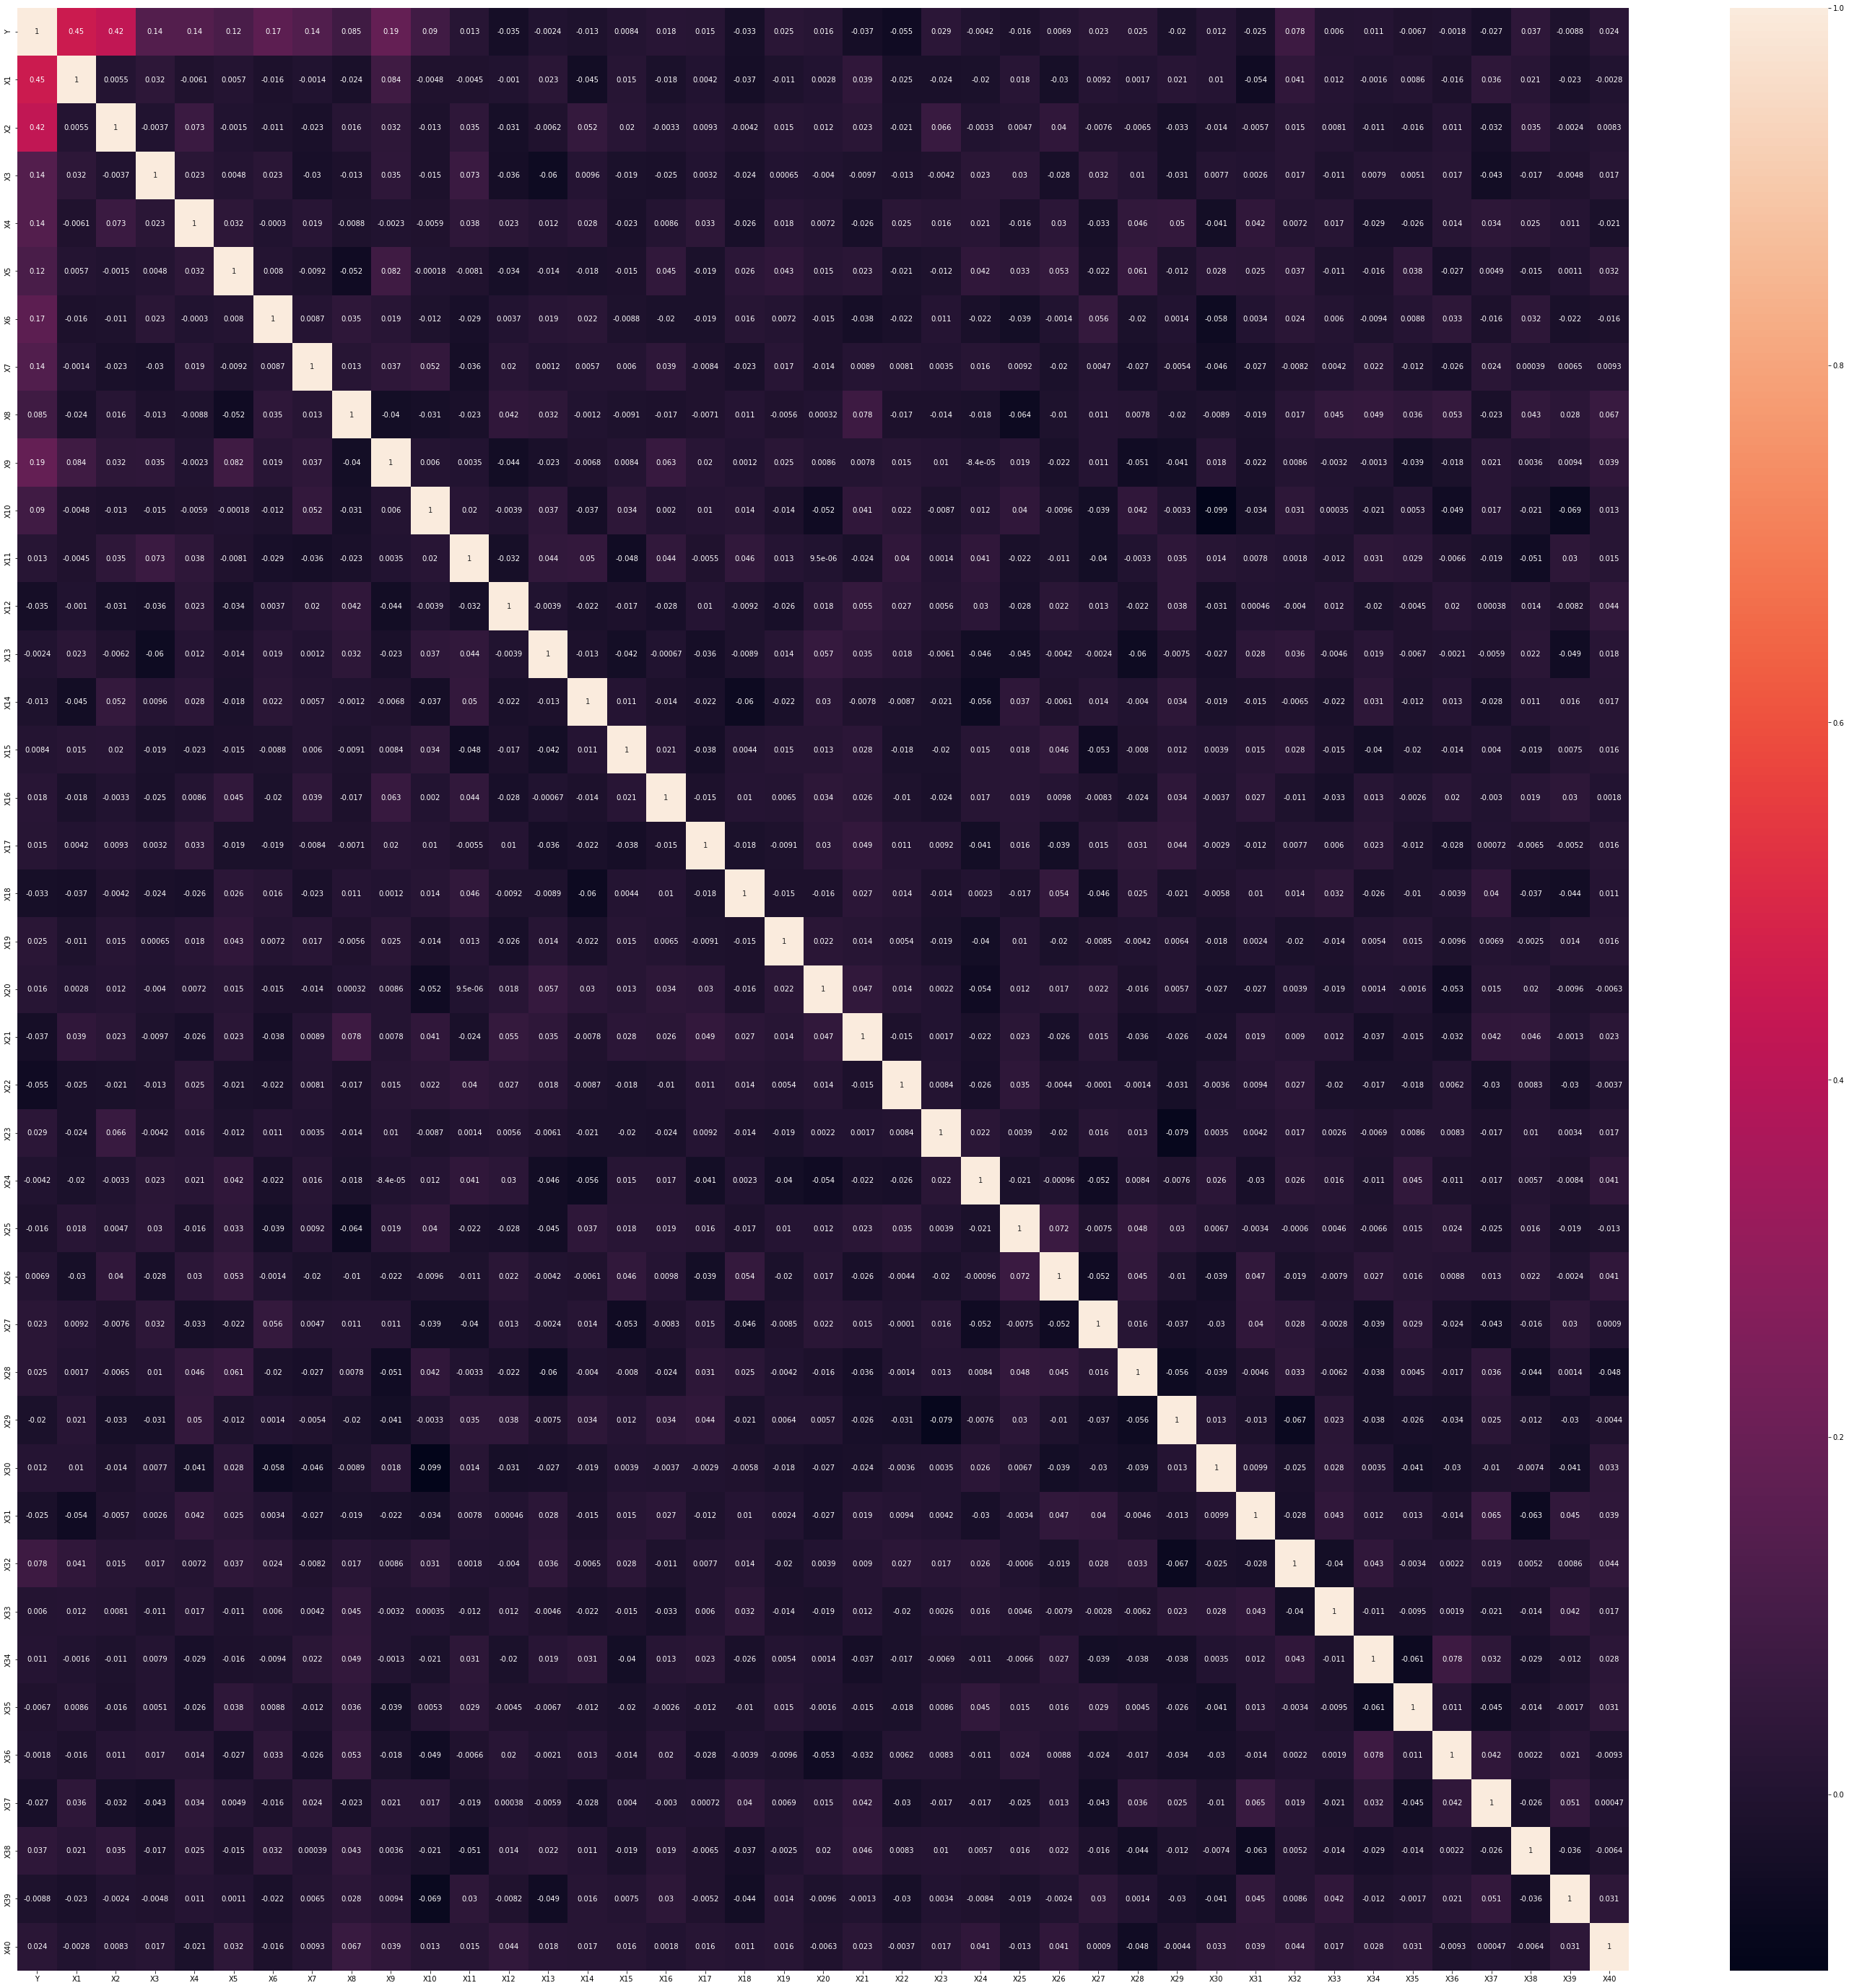

In [144]:
plt.figure(figsize = (50, 50))
sns.heatmap(df_train.corr(), annot = True)

Data Splitting and Scaling

In [145]:
features = df_train.columns[1:41]
target = df_train.columns[0]

# X and y values
X = df_train[features].values
y = df_train[target].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 2001)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (980, 40)
The dimension of X_test is (420, 40)


**Question 3**

Extending Assignment 1, now consider multiple linear regression models.

$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_K x_K + \epsilon$

Choose one multiple linear regression model and make predictions from the test data set.

In [146]:
# Model
lr = LinearRegression()

# Fit model
lr.fit(X_train, y_train)

# Predict
prediction = lr.predict(X_test)

# Actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("\nLinear Regression:\n")
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

k_folds = KFold(n_splits = 5)

scores = cross_val_score(lr, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

# Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

# Train and test score for ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model:\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

# Lasso regression model
print("\nLasso Model:\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



Linear Regression:

The train score for lr model is 0.5452526135609213
The test score for lr model is 0.43326594486511416
Cross Validation Scores:  [0.55356343 0.41047801 0.49841674 0.43691764 0.50089113]
Average CV Score:  0.48005338874763287
Number of CV Scores used in Average:  5

Ridge Model:

The train score for ridge model is 0.5451978370693313
The test score for ridge model is 0.43487430294218166

Lasso Model:

The train score for ls model is 0.0
The test score for ls model is -0.0008113953126953621


In [147]:
# Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

# Score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.5451978370693309
The train score for ridge model is 0.4348743029421951


In [148]:
model = RidgeCV()

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.55297761 0.41148371 0.49881248 0.43725315 0.50124077]
Average CV Score:  0.480353543511751
Number of CV Scores used in Average:  5


In [149]:
# Lasso Cross validation
lasso_cv = LassoCV(random_state=2001).fit(X_train, y_train)


# Score
print("The train score for ridge model is {}".format(lasso_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(lasso_cv.score(X_test, y_test)))

The train score for ridge model is 0.5350632629263681
The train score for ridge model is 0.4561898973974696


In [150]:
model = LassoCV(random_state=2001)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(model, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.54224619 0.42522414 0.51628609 0.45113844 0.51474113]
Average CV Score:  0.4899271978013563
Number of CV Scores used in Average:  5


In [151]:
lasso_cv.alpha_

0.07511248601892165

In [152]:
lasso_cv.coef_

array([ 1.74842384,  1.68350581,  0.443888  ,  0.3126607 ,  0.35056897,
        0.70519434,  0.60418555,  0.32061306,  0.45496134,  0.30563064,
       -0.01430485, -0.07129455, -0.01964998, -0.09059007,  0.        ,
        0.0898444 ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.24364011, -0.08484881,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.11535162, -0.        ,  0.02304897,
        0.        ,  0.04091842, -0.01337145,  0.11002163,  0.0309519 ,
       -0.02814902, -0.03293712, -0.        ,  0.        ,  0.        ])

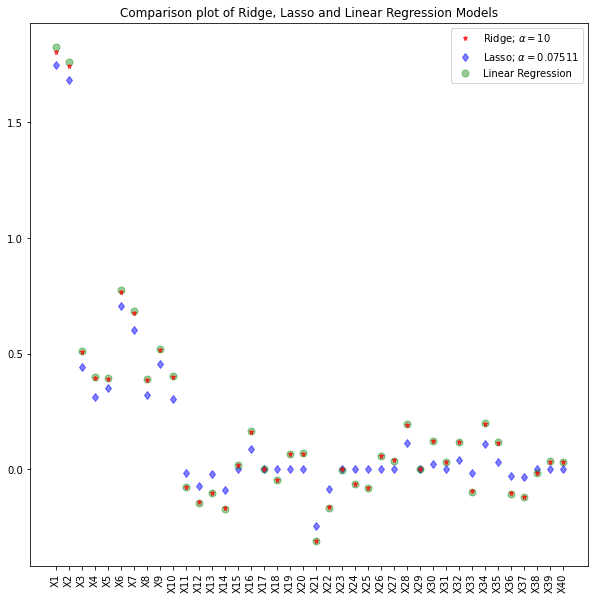

In [153]:
# Plot size
plt.figure(figsize = (10, 10))
# Add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

# Add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.07511$')

# Add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

# Rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear Regression Models")
plt.show()

**Question 4**

Get the test sample for prediction and submit your results on Kaggle to get your Kaggle score screenshot. Show the screenshot in the PDF file.

In [154]:
df_test = pd.read_csv(url_test, index_col=0)

df_test.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40
ID,,,,,,,,,,,,,,,,,,,,,
1400,1.383526,-0.604793,1.229863,-0.001352,-1.091974,-0.183959,-0.382246,-0.585346,0.551234,-0.398677,...,-1.910952,1.880733,-1.707715,0.132710,-0.711017,-0.068873,-0.412101,0.718531,-0.046361,0.910999
1401,-1.805525,-1.209279,1.105605,-0.725072,1.406829,0.277594,0.351573,0.301992,-0.895749,-1.252861,...,-0.187775,0.321442,0.608835,0.133486,0.860403,0.545383,-0.469797,2.558656,-0.042992,0.299610
1402,-1.283231,0.378460,-1.042752,-0.392231,-0.152843,-0.150497,0.323036,-0.334631,-0.915000,-0.462906,...,0.063054,-0.673070,-0.165475,-0.925128,0.435305,-0.069939,-1.830001,0.654577,-0.586005,2.719760
1403,-1.429619,-1.219039,0.271909,-1.200966,-1.862797,-0.976227,0.502075,0.371877,-0.909261,0.452577,...,1.948860,-0.133037,0.192492,-0.809552,-0.847134,-0.449216,0.367976,-0.584823,-0.938930,0.800756
1404,1.050303,-0.287341,1.076935,-1.607133,2.728414,0.295277,-2.175289,-1.336138,-0.652193,-0.685130,...,1.204753,1.024312,-0.388220,0.480520,-2.318158,0.096818,-2.005192,-0.543147,0.427429,1.666733


In [155]:
# lasso_cv = LassoCV(random_state=2001).fit(X, y)

In [156]:
# lasso_cv.alpha_

In [157]:
# lasso_cv.coef_

In [158]:
predictions = lasso_cv.predict(df_test)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(


In [159]:
df_submission = pd.read_csv(url_submission, index_col=0)

df_submission["Y"] = predictions

df_submission.head(5)

,Y
ID,
1400,2.828946
1401,-3.014929
1402,-0.876890
1403,-4.359706
1404,2.046203


In [160]:
df_submission.to_csv('submission.csv', index=True)